导入相关的包

In [37]:
import numpy as np
from matplotlib import pyplot as plt

定义计算optimal solution的函数:
$$
-\sum_{i = 1}^{n} \log (\alpha_i + x_i)
$$

In [38]:
def calculate_target(alpha,x):
    return -(np.log2(alpha+x).sum())

定义fill_water函数

首先初始化 $\nu$ 的值为 2.0 (该$\nu$值是我们经过几次实验之后的经验值), $error$ 的值为1.0, 从0开始迭代，并开创 $targets[], errors[]$ 来记录每一次迭代之后的solution以及相应的errors的变化

初始化 step\_size = 0.01,其对应了算法里的步长 t

一直迭代直到error的绝对值小于我们期望的precision，error是指 total_water（也即我们设置的1）与在目前 $\nu$ 值对应下的 total_power（也即当前状态下的 $\sum_{i=1}^{n} x$）差,不同于simple way中的取绝对值，因此error在这里还具备表征方向的作用，也即确定了下降的方向 $\Delta x$

而迭代的方法则是利用General Decent的方法，在一定步长$step\_size$下沿着$\Delta x$的方向的下降，不过此处进行优化，例如在传统的下降法的某种情况下我们让$|\Delta x| = 0.1$，以其正负作为方向，那么会在造成在目标值附近振荡的问题，我们发现随着$error$的减小，我们的步长也应该减小以逼近最优值，但毕竟还是General Descent,有别于Gradient Descent,这里便选择了$\nu += step\_size * error$的方法进行下降优化 (通过后面的结果我们可以看到，其实这样的选择针对此问题会比Gradient Descent更好，因为其的计算速度更快，且步长选择很合适)

为了方便不同时候的需要，我们加入一个判断语句，通过可选的bool参数track, 来决定我们最后的return:
* 如果我们的输出不存在问题，可将track选为false, 以此来简化输出，仅仅输出我们最后的optimmal $x^*$
* 如果我们最后的输出不知为何出了问题，或者说我们想要看到target和error在每一步iterations之后的变化，我们可将track选为true,这样就不仅仅会输出 optimal $x^*$,还会输出数组$target[] 和 error[]$



In [39]:
def fill_water(alpha, total_water, precision, track=False):
    step_size = 0.01
    nu = 2.0
    error = 1.0
    iteration = 0
    targets = []
    errors = []
    
    while np.abs(error) > precision:
        x = np.maximum(0, 1/nu - alpha)
        total_power = x.sum()
        error = total_power - total_water
        
        if track:
            targets.append(calculate_target(alpha, x))
            errors.append(error)
        
        nu += step_size * error
        
        iteration += 1
        
    if track:
        return x, targets, errors
    return x

此处我们先规定随机生成的 $\alpha$ 的区间，并规定 $total_water = 1.0$ 和 $dimension = 10$，换到实际问题中便可以是我们规定总水量为1吨，总共有10个channels，
再给出我们像要达到的精确度，此处设为了$10^{-6}$

然后我们再使用random函数随机生成了10个$\alpha_i$值，并将它们打印出来

In [40]:
alpha_range = [0.0,1.0]
total_water = 1.0
dimension = 10

precision = 1e-6

alpha = np.random.uniform(low = alpha_range[0],high = alpha_range[1],size = (dimension,1))
print(alpha)

[[0.72163422]
 [0.30456076]
 [0.7781539 ]
 [0.8456402 ]
 [0.21895801]
 [0.47348585]
 [0.93652623]
 [0.57111161]
 [0.60526959]
 [0.14898922]]


然后我们利用定义的$fill\_water$函数求出 optimal $x^*$并将其打印出来，以及将 $\sum_{i=1}^{n} x_i^*$打印出来（可以此比较其与1的差值以见是否达到要求）

同时我们求出水位 $horizontal\_ line$ 其实也即是 $1/\nu^*$,并将其打印出来

In [41]:
x = fill_water(alpha = alpha, total_water=total_water,precision=precision)
print(x)
print(x.sum())

horizontal_line = (alpha+x).min()
print(horizontal_line)

[[0.        ]
 [0.23193746]
 [0.        ]
 [0.        ]
 [0.3175402 ]
 [0.06301236]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.38750899]]
0.9999990075794267
0.5364982106984345


此处定义 $visualize\_ water$函数以对该问题的最终结果进行可视化呈现:

The height of each patch is given by $\alpha_i$. The region is flooded to a level $1/\nu^*$ which uses a total quantity of water equal to one. The height of the water (shown blue) above each patch is the optimal value of $x^*$.

In [42]:
def visualize_water(alpha,x,horizontal_line):
    alpha = alpha.squeeze()
    x = x.squeeze()

    x_range = range(1,x.shape[0]+1)
    plt.xticks(x_range)
    plt.bar(x_range,alpha,color = '#ff9966',width = 1.0,edgecolor = '#ff9966')
    plt.bar(x_range,x,bottom = alpha,color = '#4db8ff',width = 1.0)

    plt.axhline(y = horizontal_line,linewidth =1,color = 'k')
    plt.show()

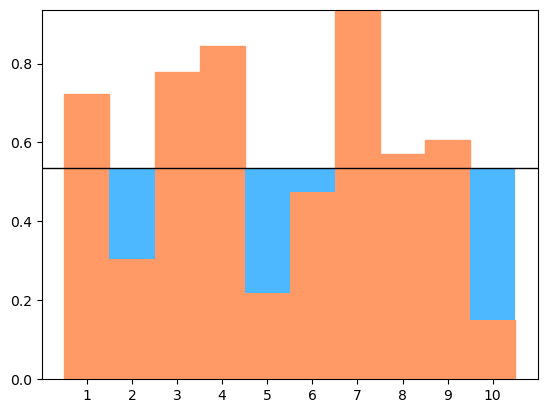

In [43]:
visualize_water(alpha,x,horizontal_line)

此处与$fill\_water$函数中的关于 $track$ 的if 判断语句相对应，可以将最终的 $x^*$ 以及每一次iteration之后的targets和errors输出，便于在代码出现问题之后debug

同时，此处可查看迭代的次数

In [44]:
x,targets,errors = fill_water(alpha = alpha,total_water=total_water,precision=precision,track = True)
print(x)
print(targets)
print(errors)

print('iteration:',len(errors))

[[0.        ]
 [0.23193746]
 [0.        ]
 [0.        ]
 [0.3175402 ]
 [0.06301236]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.38750899]]
[np.float64(6.701531381786476), np.float64(6.6973173519020435), np.float64(6.693142459702553), np.float64(6.689006430472915), np.float64(6.684908989726881), np.float64(6.680849863243014), np.float64(6.676828777100026), np.float64(6.672845457711485), np.float64(6.668899631859886), np.float64(6.664991026730088), np.float64(6.661119369942123), np.float64(6.6572843895833715), np.float64(6.653485814240109), np.float64(6.649723373028421), np.float64(6.645996795624503), np.float64(6.642305812294317), np.float64(6.638650153922643), np.float64(6.6350295520415), np.float64(6.63144373885796), np.float64(6.627892447281336), np.float64(6.624375410949763), np.float64(6.620892364256181), np.float64(6.617443042373703), np.float64(6.614027181280375), np.float64(6.610644517783368), np.float64(6.607294789542543), np.float64(6.603977735093454), np.float64(6.600693093

此处定义 $visualize\_targets\_and\_errors$函数，对在迭代过程中的targets和errors的变化进行可视化呈现，以观察实验效果

In [45]:
def visualize_targets_and_errors(targets,errors):
    x = range(len(targets))
    plt.plot(x,targets,label = 'targets')
    plt.plot(x,errors,label = 'errors')

    plt.legend(loc = 'best')

    plt.show()

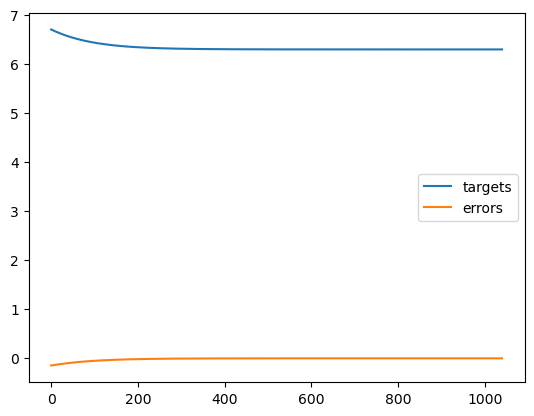

In [46]:
visualize_targets_and_errors(targets,errors)

⼀顿操作之后，我们很自然地想确认自己的结果是不是正确的，但对于该问题，由于$\alpha$生成的随机性，“标准答案”并不好寻找，我们就可以通过判断我们的实现的算法是否⽐随机⽣成的解要好，以此来判断我们的解的正确性

此处我们定义了一个 $monkey_search$函数以生成随机解，并将其可视化呈现。其中橙线是我们得到的optimal solution of $-\sum_{i = 1}^{n} \log (\alpha_i + x_i)$,蓝点即是每一只“猴子”确定的随机解

In [47]:
def monkey_search(alpha):
    while True:
        monkey_solutions = np.random.dirichlet(np.ones(10),size = 1).reshape(-1,1)
        if np.less(monkey_solutions,0).any():
            continue
        return monkey_solutions
    
def visualize_monkey_search(alpha,monkey_amount,optimal):
    monkey_solutions = [calculate_target(alpha,monkey_search(alpha))\
                        for _ in range(monkey_amount)]
    plt.scatter(range(monkey_amount),monkey_solutions)
    plt.axhline(y = optimal,linewidth = 1,color = 'r')

    plt.show()

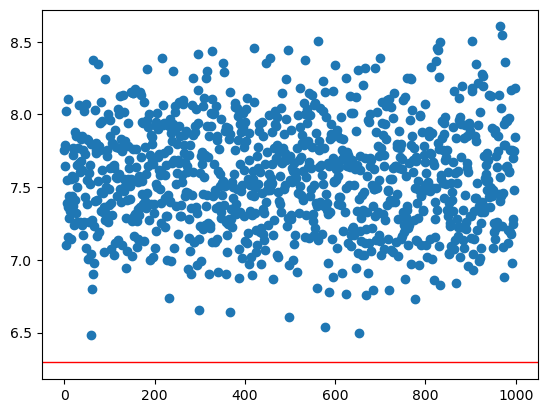

In [48]:
optimal_line= targets[len(targets)-1]
visualize_monkey_search(alpha,1000,optimal_line)